The 'os' module eases interactions with the file system, and 'PIL' (Python Imaging Library) is enlisted for image manipulation tasks. 'NumPy' finds application in numerical operations, while 'Matplotlib' is integrated for generating graphs. The 'train_test_split' function sourced from 'sklearn.model_selection' plays a pivotal role in grouping the data into distinct training and testing sets. The 'LabelEncoder' class, retrieved from 'sklearn.preprocessing', transforms categorical labels into numerical representations. Metrics for evaluating the model's performance, such as the classification report and confusion matrix, are introduced via imports from 'sklearn.metrics'. The 'img_to_array' and 'load_img' functions sourced from 'tensorflow.keras.preprocessing.image' contribute to image preprocessing efforts. 'To_categorical', drawn from 'tensorflow.keras.utils', serves the purpose of one-hot encoding. Additionally, layers like 'Sequential', 'Conv2D', 'MaxPooling2D', 'Flatten', and 'Dense' from 'tensorflow.keras.layers' are instrumental in constructing a Convolutional Neural Network (CNN). Lastly, the 'History' callback from 'tensorflow.keras.callbacks' is integrated to monitor and record the training history

In [1]:
# Import necessary libraries
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam as LegacyAdam

This function is designed to load images and their corresponding labels from a specified folder. It iterates through the files in the given folder, skips non-image files based on their extensions, and attempts to load valid images. For each valid image, it ensures the image is in RGB format, resizes it to 224x224 pixels (This is relevant as it helps during computation), converts it to a NumPy array, and appends the array to the 'images' list along with the provided label in the 'labels' list

In [2]:
# Function to load images and labels
def load_images_and_labels(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        # Skip non-image files
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            print(f"Skipping non-image file: {img_path}")
            continue

        try:
            
            # Check if the file is a valid image
            with Image.open(img_path) as img:
                img = img.convert('RGB')  
                img = img.resize((224, 224))  
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(label)
        except (Image.UnidentifiedImageError, OSError) as e:
            print(f"Error loading image {img_path}: {e}")

    return images, labels

In [3]:
# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


In [4]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Actual label')
    plt.ylabel('Predicted label')
    plt.show()

The images collected were grouped into two. "Normal_Eye" folder containing 225 images and "Suspect_Eye" folder containing 139 images (107 suspect_Glaucoma images + 32 glaucoma images). They are stored in JPEG format and have a resolution of 2544 × 1696 pixels.

In [5]:
# Set the paths to your image folders
normal_eye_path = "/Users/user/Desktop/Normal_Eye"
suspect_glaucoma_eye_path = "/Users/user/Desktop/Suspect_Eye"

In [6]:
# Load normal eye images and labels
normal_eye_images, normal_eye_labels = load_images_and_labels(normal_eye_path, "normal")

Skipping non-image file: /Users/user/Desktop/Normal_Eye/.DS_Store


In [7]:
# Load suspect glaucoma eye images and labels
glaucoma_eye_images, glaucoma_eye_labels = load_images_and_labels(suspect_glaucoma_eye_path, "glaucoma")

Skipping non-image file: /Users/user/Desktop/Suspect_Eye/.DS_Store


In [8]:
# Balance the data
np.random.seed(42)

In [9]:
# Get indices for normal eye images
num_images_to_select = len(glaucoma_eye_images)
indices_to_select = np.random.choice(len(normal_eye_images), size=num_images_to_select, replace=False)


In [10]:
# Select normal eye images and labels based on the randomly chosen indices
balanced_normal_eye_images = [normal_eye_images[i] for i in indices_to_select]
balanced_normal_eye_labels = ["normal"] * num_images_to_select

In [11]:
# Combine the data
all_images = balanced_normal_eye_images + glaucoma_eye_images
all_labels = balanced_normal_eye_labels + glaucoma_eye_labels

In [12]:
# Convert labels to numerical values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)
encoded_labels = to_categorical(encoded_labels)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_images, encoded_labels, test_size=0.2, random_state=42)


In [14]:
# Build a simple convolutional neural network (CNN) model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))


# Build a modified convolutional neural network (CNN) model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Increased neurons in the dense layer
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(np.array(X_train), np.array(y_train), epochs=30, batch_size=64, validation_split=0.2)


Epoch 1/30
3/3 [==============================] - 13s 4s/step - loss: 396.4242 - accuracy: 0.4802 - val_loss: 101.5962 - val_accuracy: 0.4444
Epoch 2/30
3/3 [==============================] - 12s 4s/step - loss: 42.6990 - accuracy: 0.5028 - val_loss: 4.0141 - val_accuracy: 0.4444
Epoch 3/30
3/3 [==============================] - 12s 4s/step - loss: 2.2793 - accuracy: 0.4972 - val_loss: 5.0704 - val_accuracy: 0.4444
Epoch 4/30
3/3 [==============================] - 15s 5s/step - loss: 2.4976 - accuracy: 0.4689 - val_loss: 0.7449 - val_accuracy: 0.5556
Epoch 5/30
3/3 [==============================] - 12s 4s/step - loss: 0.8634 - accuracy: 0.4972 - val_loss: 0.7014 - val_accuracy: 0.5556
Epoch 6/30
3/3 [==============================] - 12s 4s/step - loss: 0.8720 - accuracy: 0.4859 - val_loss: 0.7186 - val_accuracy: 0.5111
Epoch 7/30
3/3 [==============================] - 12s 4s/step - loss: 0.7075 - accuracy: 0.5424 - val_loss: 0.7829 - val_accuracy: 0.4444
Epoch 8/30
3/3 [=============

In [17]:
# Evaluate the model on the test set
y_pred = np.argmax(model.predict(np.array(X_test)), axis=1)
y_true = np.argmax(np.array(y_test), axis=1)

2/2 [==============================] - 1s 316ms/step


In [18]:
# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.45      0.58        29
           1       0.60      0.89      0.72        27

    accuracy                           0.66        56
   macro avg       0.71      0.67      0.65        56
weighted avg       0.71      0.66      0.64        56



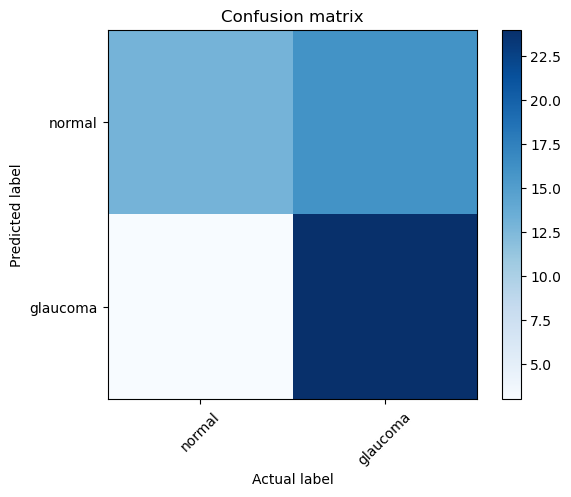

In [19]:
# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, class_names=["normal", "glaucoma"])

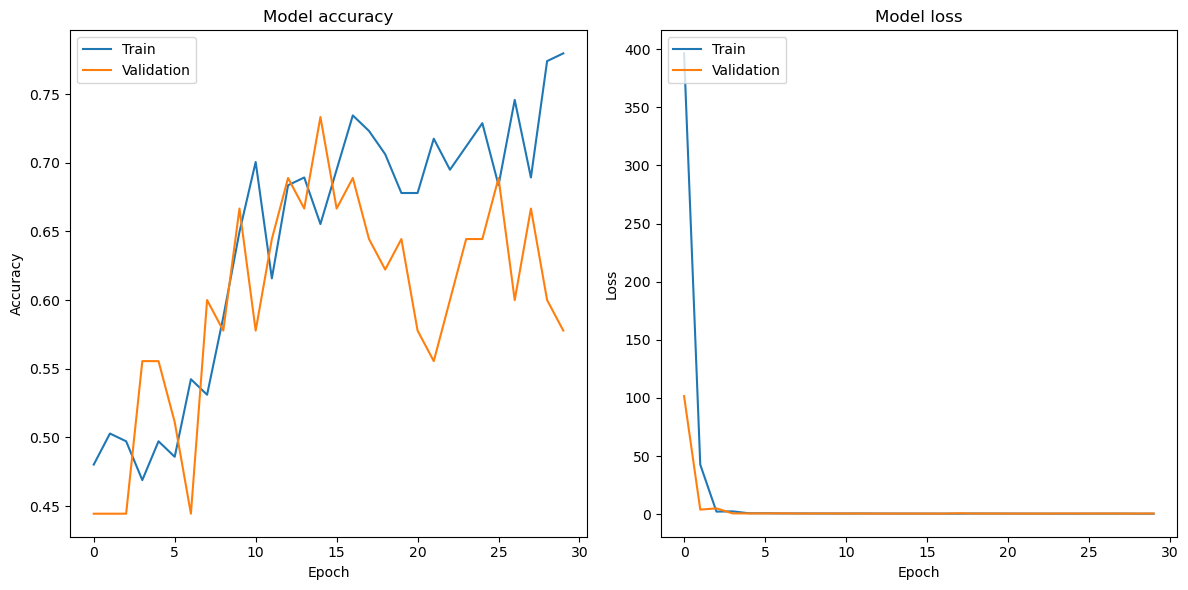

In [20]:
# Plot training history
plot_training_history(history)